<a href="https://qworld.net" target="_blank" align="left"><img src="https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/images/header.jpg" align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

_prepared by Abuzer Yakaryilmaz_

<font size="28px" style="font-size:28px;" align="left"><b> Phase Kickback </b></font>
<br>
<br><br>
[<img src="https://gitlab.com/qworld/qeducation/qbook101/raw/main/qworld/images/watch_lecture.jpg" align="left">](https://youtu.be/7H7A9IRPc8s)
<br><br><br>

##### <font color="#08b806">Please execute the following cell, it is necessary to distinguish between your local environment and Google Colab's

In [1]:
import IPython

def in_colab():
    try:
        import google.colab
        return True
    except:
        return False

SolutionToTask1 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1INVHftQGCdRazI1uyFUEFGp2csfCixm0?usp=sharing#scrollTo=d0epFOG2N3go' if in_colab() else 'QB25_Q64_Phase_Kickback_Solutions.ipynb#task1')))
SolutionToTask2 = lambda: IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url='https://colab.research.google.com/drive/1INVHftQGCdRazI1uyFUEFGp2csfCixm0?usp=sharing#scrollTo=i1SZYMcLN3gp' if in_colab() else 'QB25_Q64_Phase_Kickback_Solutions.ipynb#task2')))

if in_colab():
    !pip install qiskit[visualization]
    !pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 20.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 83.9 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=b0f66fd575d72702a853e77c80a6b6fb51acff570bc4e4e3c0d95f065fa8f6e6
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc55

##### We observe another interesting quantum effect here.

We apply a Controlled-NOT operator, but the controller qubit will be affected!

<h3> Task 1</h3>

Create a quantum circuit with two qubits, say $ q[1] $ and $ q[0] $ in the reading order of Qiskit.

We start in quantum state $ \ket{01} $:
- set the state of $ q[1] $ to $ \ket{0} $, and
- set the state of $ q[0] $ to $ \ket{1} $.

Apply Hadamard to both qubits.

Apply CNOT operator, where the controller qubit is $ q[1] $ and the target qubit is $ q[0] $.

Apply Hadamard to both qubits.

Measure the outcomes.

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


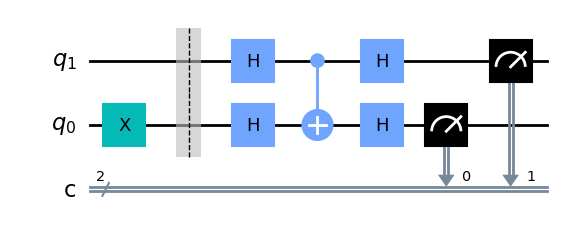

{'11': 100}


In [3]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

q =  QuantumRegister(2,"q") # quantum register with 2 qubits
c = ClassicalRegister(2,"c") # classical register with 2 bits

qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

# the up qubit is in |0>

# set the down qubit to |1>
qc.x(q[0]) # apply x-gate (NOT operator)

qc.barrier()

# apply Hadamard to both qubits.
qc.h(q[0])
qc.h(q[1])

# apply CNOT operator, where the controller qubit is the up qubit and the target qubit is the down qubit.
qc.cx(1,0)

# apply Hadamard to both qubits.
qc.h(q[0])
qc.h(q[1])

# measure both qubits
qc.measure(q,c)

# draw the circuit in Qiskit reading order
display(qc.draw(output='mpl',reverse_bits=True))

# execute the circuit 100 times in the local simulator
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qc)
print(counts)


To check out our solution, run the next cell:

In [2]:
SolutionToTask1()  # show solution for task 1

<IPython.core.display.Javascript object>

<h3> The effect of CNOT </h3>

The quantum state of the up qubit before CNOT:

$$
    \ket{0} \xrightarrow{H} \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1}.
$$

The quantum state of the down qubit before CNOT:

$$
    \ket{1} \xrightarrow{H} \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}.
$$

The quantum state of the composite system:

$$
   \mypar{ \frac{1}{\sqrt{2}} \ket{0} + \frac{1}{\sqrt{2}} \ket{1} }
   \otimes
   \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
$$

CNOT affects when the up qubit has the value 1.

Let's rewrite the composite state as below to explicitly represent the effect of CNOT.

$$
     \frac{1}{\sqrt{2}} \ket{0} \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
     +
     \frac{1}{\sqrt{2}} \ket{1} \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
$$

CNOT flips the state of the down qubit.

After CNOT, we have:

$$
     \frac{1}{\sqrt{2}} \ket{0} \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
     +
     \frac{1}{\sqrt{2}} \ket{1} \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{1} - \frac{1}{\sqrt{2}} \ket{0}  }
$$

Remark that $\ket{0}$ and $ \ket{1} $ are swapped in the second qubit.

If we write the quantum state of the down qubit as before, the sign of $ \ket{1} $ in the up qubit should be flipped.

Thus the last equation can be equivalently written as follows:

$$
     \frac{1}{\sqrt{2}} \ket{0} \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
     -
     \frac{1}{\sqrt{2}} \ket{1} \otimes \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
$$

Before CNOT operator, the sign of $ \ket{1} $ in the up qubit is positive.
    
After CNOT operator, its sign changes to negative.

This is called <b>phase kickback</b>.

<h3> After CNOT </h3>

It is easy to see from the last expression, that the quantum states of the qubits are separable (no correlation):

$$
   \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1} }
   \otimes
   \mypar{ \frac{1}{\sqrt{2}} \ket{0} - \frac{1}{\sqrt{2}} \ket{1}  }
$$

If we apply Hadamard to each qubit, both qubits evolve to state $ \ket{1} $.

The final state is $ \ket{11} $.

<h3> Task 2 </h3>

Create a circuit  with 7 qubits, say $ q[6],\ldots,q[0] $ in the reading order of Qiskit.

Set the states of the top six qubits to $ \ket{0} $.

Set the state of the bottom qubit to $ \ket{1} $.

Apply Hadamard operators to all qubits.

Apply CNOT operator ($q[1]$,$q[0]$)
<br>
Apply CNOT operator ($q[4]$,$q[0]$)
<br>
Apply CNOT operator ($q[5]$,$q[0]$)

Apply Hadamard operators to all qubits.

Measure all qubits.

For each CNOT operator, is there a phase-kickback effect?

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


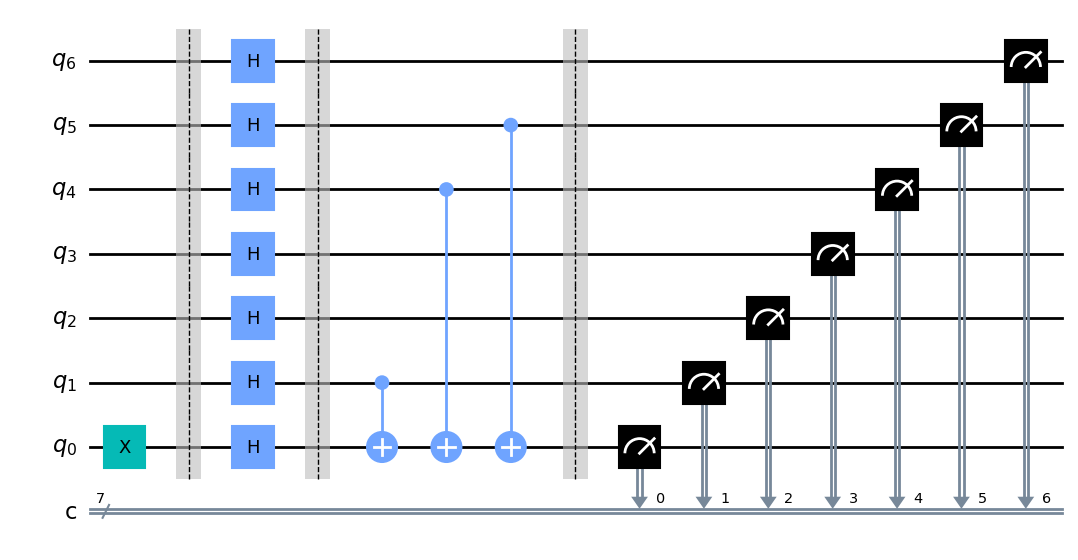

{'1010110': 1, '1111001': 1, '1001101': 3, '0001110': 1, '1000000': 1, '1110111': 1, '0101011': 2, '1001001': 1, '0001001': 1, '1111000': 1, '1001110': 1, '0101110': 1, '0011110': 3, '1010000': 2, '1000101': 2, '0011111': 1, '1000110': 2, '0001000': 2, '0111101': 1, '0111110': 1, '0011100': 2, '1000111': 1, '1001100': 1, '0010010': 1, '1001010': 1, '1110100': 1, '1010010': 2, '0111111': 4, '1011011': 2, '1011100': 1, '0101000': 2, '1000010': 1, '1111100': 1, '1000001': 4, '0010110': 1, '0001011': 2, '0111011': 1, '1111110': 1, '0000110': 1, '0001100': 1, '1010111': 3, '0101010': 2, '0101100': 1, '0001010': 2, '0111001': 3, '1101110': 1, '0010000': 2, '1101001': 2, '1100110': 1, '1001011': 1, '0000011': 1, '1101000': 1, '1000011': 1, '0101001': 1, '0011010': 2, '0000001': 3, '0011101': 1, '0000101': 2, '1110101': 2, '1101111': 1, '0000010': 2, '0110101': 1, '1011101': 2, '0111100': 1, '1100011': 1}


In [4]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
q=QuantumRegister(7,'q')
c=ClassicalRegister(7,'c')
qc=QuantumCircuit(q,c)
qc.x(q[0])
qc.barrier()
for i in range(7):
  qc.h(i)
qc.barrier()
qc.cx(q[1],q[0])
qc.cx(q[4],q[0])
qc.cx(q[5],q[0])
qc.barrier()
qc.measure(q,c)
display(qc.draw(output='mpl',reverse_bits=True))
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qc)
print(counts)


To check out our solution, run the next cell:

In [ ]:
SolutionToTask2()  # show solution for task 2